In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/project_2')
!ls


Mounted at /content/drive
 code.py     df_no_size.csv	'ScrappDB Product Setup.pdf'
 Data.xlsx   Introduction.docx	'Scrapp Packaging Assignment Guide.xlsx'
 df.csv      project_2.ipynb


In [ ]:
#packages
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#upload data 
excel_data = pd.read_excel("Data.xlsx")
raw_data = pd.DataFrame(excel_data)
print(raw_data.shape)
raw_data.head()

(23437, 23)


,product_id,barcode,brand,name,size,size_unit,product_category_id,product_type_id,container_id,material_1,...,material_3,packaging_part_3,material_4,packaging_part_4,material_5,packaging_part_5,material_6,packaging_part_6,material_7,packaging_part_7
0,9306.0,5.009726e+07,Axe,Roll On Deoterant: Africa,NaN,NaN,beauty_cosmetics,legacy,applicator_plastic,pm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9307.0,2.537551e+07,Health Essentials,Ibuprofen 200mg Coated Tablets,NaN,NaN,healthcare,legacy,box_paper,cc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9308.0,8.386233e+11,Between The Lines,Disposable Masks,NaN,NaN,healthcare,legacy,pouch_plastic,pm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9309.0,2.537553e+07,Health Essentials,Paracetamol 500mg Tablets,NaN,NaN,healthcare,legacy,box_paper,cc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9310.0,8.134810e+11,Chagrin Valley Soap & Salve,Lavender Rosemary Lotion Candle,NaN,NaN,household,legacy,tin_metal,ma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_data.describe()

In [ ]:
#the max of size looks odd 
i_max = raw_data["size"].idxmax()
raw_data.loc[i_max,]

product_id                                                       94679.0
barcode                                                  3064797260822.0
brand                                                                 Ka
name                   Ka Sparkling Black Grape Flavour Drink 2 Litre...
size                                                             12000.0
size_unit                                                             ml
product_category_id                                                drink
product_type_id                                               carbonated
container_id                                              bottle_plastic
material_1                                                            p1
packaging_part_1                                                     btl
material_2                                                            p5
packaging_part_2                                                     cap
material_3                                         

In [ ]:
raw_data.isnull().sum().sort_values(ascending = False)

packaging_part_7       23437
material_7             23437
packaging_part_6       23434
material_6             23434
packaging_part_5       23276
material_5             23276
packaging_part_4       22563
material_4             22563
packaging_part_3       17018
material_3             17018
packaging_part_2        9560
material_2              9560
size                    1615
size_unit               1232
barcode                    0
packaging_part_1           0
material_1                 0
container_id               0
product_type_id            0
product_category_id        0
name                       0
brand                      0
product_id                 0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

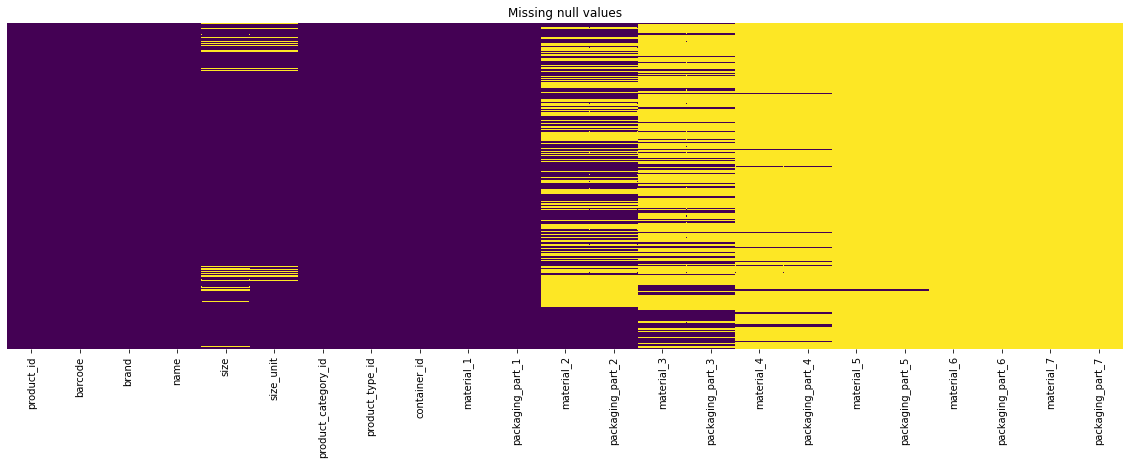

In [ ]:
plt.rcParams['figure.figsize'] = (20,6)
sns.heatmap(raw_data.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

In [ ]:
#unique count
raw_data.nunique()


In [ ]:
#number of materials 
temp = raw_data.iloc[:,9:23] # Select columns by Index
data_part_count = raw_data
data_part_count["n_parts"] = (14 - temp.isnull().sum(axis=1)) / 2

#check if there is any part without material or vice versa
print(data_part_count.n_parts.apply(float.is_integer).all()) #true meaning all counts were even so all are integer

data_part_count.head()


True


,product_id,barcode,brand,name,size,size_unit,product_category_id,product_type_id,container_id,material_1,...,packaging_part_3,material_4,packaging_part_4,material_5,packaging_part_5,material_6,packaging_part_6,material_7,packaging_part_7,n_parts
0,9306.0,5.009726e+07,Axe,Roll On Deoterant: Africa,NaN,NaN,beauty_cosmetics,legacy,applicator_plastic,pm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,9307.0,2.537551e+07,Health Essentials,Ibuprofen 200mg Coated Tablets,NaN,NaN,healthcare,legacy,box_paper,cc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,9308.0,8.386233e+11,Between The Lines,Disposable Masks,NaN,NaN,healthcare,legacy,pouch_plastic,pm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,9309.0,2.537553e+07,Health Essentials,Paracetamol 500mg Tablets,NaN,NaN,healthcare,legacy,box_paper,cc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,9310.0,8.134810e+11,Chagrin Valley Soap & Salve,Lavender Rosemary Lotion Candle,NaN,NaN,household,legacy,tin_metal,ma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
temp.head()

In [ ]:
#plot histogram of number of part count
plt.hist(data_part_count.n_parts)
plt.show()


In [ ]:
#correlation matrix
corrMatrix=data_part_count.corr()
plt.show(sns.heatmap(corrMatrix,cmap="icefire",linewidths=1))


NameError: ignored

In [ ]:
#lower two columns which have duplicate entries for the same category 
data_lower = data_part_count
data_lower['container_id'] = data_lower['container_id'].str.lower()
data_lower['product_category_id'] = data_lower['product_category_id'].str.lower()

In [ ]:
data_lower["product_category_id"].value_counts()



food                 14652
drink                 5613
personal_hygiene       846
household              747
textiles               476
cleaning_products      298
beauty_cosmetics       195
healthcare             174
toys                   153
pet_supplies           133
diy_industrial          64
other                   49
electronics             19
hazardous               10
media                    8
Name: product_category_id, dtype: int64

In [ ]:
#get rid of product_type_id = "legacy" rows
legacy_ind = data_lower[data_lower["product_type_id"] == "legacy"].index #3566 row
data_no_legacy = data_lower.drop(legacy_ind) #19871 row


In [ ]:
#get rid of size = NULL rows
data_size_complete = data_no_legacy[data_no_legacy['size'].notnull()] #18704 rows


In [ ]:
#final data frames to use with and without size components
df = data_no_legacy 
df_no_size = data_size_complete

In [ ]:
#convert final dataframes to csv 
df.to_csv('df.csv')
df_no_size.to_csv('df_no_size.csv')


In [ ]:
from google.colab import files
files.download('df.csv')
files.download('df_no_size.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>